In [ ]:
#scenario 1 
#28 of the 94 claimants 
#are not nearly as “disabled” as their diagnosis suggests, and the hypothetical level of fraud is 16%.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

In [12]:
count= 28
nobs= 94
value= .16
stat,pval= proportions_ztest(count,nobs,value)
print(stat,pval)

2.9229268377264077 0.0034675798365736213


In [ ]:
#scenario 2

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [40]:
df2 = pd.read_csv("C:/Users/User/Downloads/antiseptics/antiseptics.csv")
df2.rename(columns={'Antiseptic Type ': "AS", "Number of applications": "Count"}, inplace=True)

In [41]:
df2_pivot = pd.pivot_table(df2,index='AS',columns='Clinic',values="Count")
df2_pivot

Clinic,1,2,3
AS,,,
A,22,38,84
B,71,112,298
C,8,14,37
D,49,69,182


In [42]:
stats.chi2_contingency(df2_pivot)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

In [43]:
#scenario 3

In [44]:
df3 = pd.read_csv("C:/Users/User/Downloads/savings/savings.csv")
df3.head()

,Group A,Group B,Group C,Group D
0,21383.06,17077.54,13636.38,14582.73
1,19729.92,17258.06,5156.36,12880.28
2,24071.53,20652.91,4446.92,16412.72
3,19056.28,20845.06,4892.59,14020.00
4,19147.18,22296.64,14099.38,16467.70


In [45]:
df3_expanded=pd.melt(df3,var_name='Group', value_name='$')

In [46]:
df3_expanded

,Group,$
0,Group A,21383.06
1,Group A,19729.92
2,Group A,24071.53
3,Group A,19056.28
4,Group A,19147.18
...,...,...
227,Group D,12180.86
228,Group D,12972.11
229,Group D,12068.83
230,Group D,16064.42


In [47]:
df3_expanded = df3_expanded.replace(df3.columns, [0,1,2,3])
df3_expanded.head()

,Group,$
0,0,21383.06
1,0,19729.92
2,0,24071.53
3,0,19056.28
4,0,19147.18


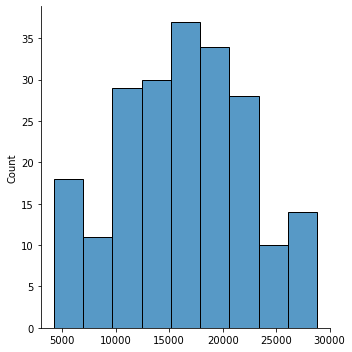

In [48]:
#plot dependent variable
sns.displot(df3.values[~np.isnan(df3.values)])

In [56]:
scipy.stats.bartlett(df3_expanded['Group'],df3_expanded['$'])

BartlettResult(statistic=3302.821306067404, pvalue=0.0)

In [51]:
df3_expanded.dropna(inplace=True)

In [69]:
stats.f_oneway(df3_expanded['Group'][df3_expanded['$']==0],
            (df3_expanded['Group'][df3_expanded['$']==1],
            (df3_expanded['Group'][df3_expanded['$']==2],
            (df3_expanded['Group'][df3_expanded['$']==3])

SyntaxError: unexpected EOF while parsing (<ipython-input-69-bb34295545d7>, line 4)

In [ ]:
#Scenario 4 Voters favorable or not and if they have children or not

In [77]:
count= np.array([374,129])
nobs= np.array([171,74])
alpha = 0.05
stat,pval= proportions_ztest(count,nobs,alpha)
print(stat,pval)

nan nan
